<a href="https://colab.research.google.com/github/ovieimara/ITNPBD6/blob/master/ExerciseSession2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Splitting Your Data
In this exercise, we'll load the same motor premiums data as you did in your last exercise with Python.

In practice, what should happen is to do data cleaning after splitting training/test data. The reasoning behind this is that any data cleaning is part of the pipeline: it can influence the model accuracy too. Once you've decided the cleaning steps, you'd then (possibly) apply them to test data too. More discussion on this will follow in later weeks.

Here we'll look at how we can split the data into train/validation/test sets and how to use cross-fold validation. Cleaning steps are added after the train/test split.

(remember, click on a cell, then control+enter will run it)

In [2]:
import pandas as pd
import numpy as np

# load the data...
# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("MotorPremiums.csv")

# Train / Test split
If you've also completed this exercise in Orange, we're now replicating what we did with Data Sampler.

First, we separate into X (the input features) and y (the target).

Then splitting is really easy! We use train_test_split(); test_size is the fraction of the data that will form your test set; random_state initialises the random number generator so if you rerun it the split will be the same (change the number for a different split).

In [4]:
# set features and targets
targetName="Premium"
allFeatureNames=df.columns[df.columns != targetName]
X = df[allFeatureNames]
y = df[targetName]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=402)

We have now split the data, at random, into two sets. X_train and y_train are the training data, and should contain 3509 data points.

In [6]:
X_train

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age
3942,B11376082,35,M,UK,7,4,1,1200,4,Road,15
519,B39004071,53,M,UK,35,0,3,1200,3,Garage,1
2165,B520403,55,M,UK,16,0,3,1200,3,Garage,3
2171,A51648972,61,M,UK,39,0,4,1400,6,Garage,3
1135,B45810673,18,F,UK,1,0,3,1200,4,Garage,1
...,...,...,...,...,...,...,...,...,...,...,...
2469,A36517462,50,M,UK,11,0,0,1400,6,Garage,10
1807,A65813411,36,F,UK,12,0,2,1200,2,Road,1
2014,A96543980,75,F,UK,12,0,1,1800,3,Garage,1
1226,B66545713,78,M,UK,48,0,1,1400,3,Road,1


from matplotlib import pyplot as plt
X_train['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['Yrs DL'].plot(kind='hist', bins=20, title='Yrs DL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['Points'].plot(kind='hist', bins=20, title='Points')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['NCD'].plot(kind='hist', bins=20, title='NCD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
X_train.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
X_train.groupby('LicenceCountry').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
X_train.groupby('Stored').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='Age', y='Yrs DL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='Yrs DL', y='Points', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='Points', y='NCD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='NCD', y='Engine cc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['Yrs DL'].plot(kind='line', figsize=(8, 4), title='Yrs DL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['Points'].plot(kind='line', figsize=(8, 4), title='Points')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['NCD'].plot(kind='line', figsize=(8, 4), title='NCD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LicenceCountry'].value_counts()
    for x_label, grp in X_train.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('LicenceCountry')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Stored'].value_counts()
    for x_label, grp in X_train.groupby('LicenceCountry')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('LicenceCountry')
_ = plt.ylabel('Stored')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X_train['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X_train, x='Age', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X_train['LicenceCountry'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X_train, x='Age', y='LicenceCountry', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X_train['Stored'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X_train, x='Age', y='Stored', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X_train['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X_train, x='Yrs DL', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

We repeat the same process to produce a validation set as well...

In [7]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

We now have X_train, X_validation, and X_test, with the "y_" equivalents. We now start to develop our pipeline. For now, that means we do the same data cleaning we did in week 1...

In [10]:
# choose the rows we want to keep
X_train_cleaned = X_train[(X_train.LicenceCountry=="UK") & (X_train.Stored!="0")]
y_train_cleaned = y_train[(X_train.LicenceCountry=="UK") & (X_train.Stored!="0")] # remove the same rows from the target

# this is needed so the row numbers are still in sequence
X_train_cleaned = X_train_cleaned.reset_index(drop=True)
y_train_cleaned = y_train_cleaned.reset_index(drop=True)

# define the list of features to keep
selected_features = ['Age','Gender','Yrs DL','Points','NCD','Engine cc',
                     'Ins Group','Stored','Car Age']

# update the data frame
X_train_cleaned = X_train_cleaned[selected_features]

# Map 'Female' and 'Male' F and M
X_train_cleaned['Gender'] = X_train_cleaned['Gender'].replace({'Female':'F','Male':'M'})

Now, encode the categorical variables.

This happens automatically in Orange: the models will only accept numbers as inputs, so we need to "encode" categorical variables, converting them into numbers. We used get_dummies() to do this last time, but now we're working on train/test sets separately we will want to be able to create the same columns on both; for that we'll use the OneHotEncoder that comes with sklearn. Doing it this way lets us remember the columns from the training set to use on the test set (or in deployment) later.

In [12]:
# As an example of how OneHotEncoder works, here is a list of values for a categorical variable:
# (this is actually a grid/table, with only one column)
# example of a dummy variable encoding
from numpy import asarray
#data = asarray([['red'], ['green'], ['blue']])
example_list = asarray([['apple'], ['orange'], ['pear'], ['apple']])

# make a new OneHotEncoder to do the work for us...
# ("sparse" makes the output more condensed for efficiency, but harder to read, so we'll disable that)
from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(sparse=False)
enc = OneHotEncoder()


# fit() works out which columns to make and stores them in "enc"
enc.fit(example_list)

OneHotEncoder()

In [13]:
# transform() then makes those columns in the data set we provide
transformed_data = enc.transform(example_list)

# you should see four rows, corresponding to the four data points in the original example_list
# there are three columns, one for each of apple/orange/pear
# each row has a 1 to show which fruit was in that position in the list
print(transformed_data)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0


At the same time, we can normalise the numerical variables to the range 0..1 using a MinMaxScaler, which is used in a similar way. These two processing steps can be combined into one processing routine using ColumnTransformer...

In [14]:
# First, determine categorical and numerical features
# we can do that automatically looking for the column data types like this:
numerical_ix = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X_train_cleaned.select_dtypes(include=['object', 'bool']).columns

# this now contains the names of the numerical variables:
numerical_ix

Index(['Age', 'Yrs DL', 'Points', 'NCD', 'Engine cc', 'Ins Group', 'Car Age'], dtype='object')

In [15]:
# ...and similar for the categorical:
categorical_ix

Index(['Gender', 'Stored'], dtype='object')

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# define the data preparation for the columns
#
# categorical columns will have a one hot encoder applied
#   (note - we also set this to drop the first "dummy" column, similer to what we did last week; we have also
#    told it how to handle unknown values, those that don't appear in the training data but do appear in validation
#    or testing. 'infrequent_if_exist' assigns any unknown values to a separate category)
#
# numerical columns will be normalised
#
# each processing step also includes the list of columns that it will be applied to
t = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)


# fit() works out which columns to make and stores them in "enc"
col_transform.fit_transform(X_train_cleaned)

# transform() then makes those columns in the data set we provide
X_train_encoded = col_transform.transform(X_train_cleaned)

# X_train_encoded will now be a numpy array, which can be used for training
# the columns in this are the raw data
print(X_train_encoded)

[[0.         0.         1.         ... 0.         0.66666667 0.        ]
 [1.         1.         0.         ... 0.         0.66666667 0.26315789]
 [0.         1.         0.         ... 0.07692308 0.33333333 0.        ]
 ...
 [0.         1.         0.         ... 0.         0.66666667 0.05263158]
 [1.         0.         1.         ... 0.07692308 0.16666667 0.        ]
 [1.         0.         1.         ... 0.         0.5        0.        ]]


We can then use the training data to train a model and use that model for doing predictions, like this:

In [23]:
# make a new model - MLPRegressor is an artificial neural network
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(10), alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, max_iter=1000, random_state=1)

# train the model on (or fit the model to) our training data
mlp_model.fit(X_train_encoded, y_train_cleaned)

MLPRegressor(alpha=0.001, hidden_layer_sizes=10, learning_rate_init=0.01,
             max_iter=1000, random_state=1)

Well done, you've just made your first model in scikit learn! We can now apply this model to unseen data to make some predictions. We'll use the validation set we separated out above for this.

In [21]:
# first, apply the same column transformations to the validation data...
X_validation_transformed = col_transform.transform(X_validation)

18.693737888903843


Text(0, 0.5, 'Predictions')

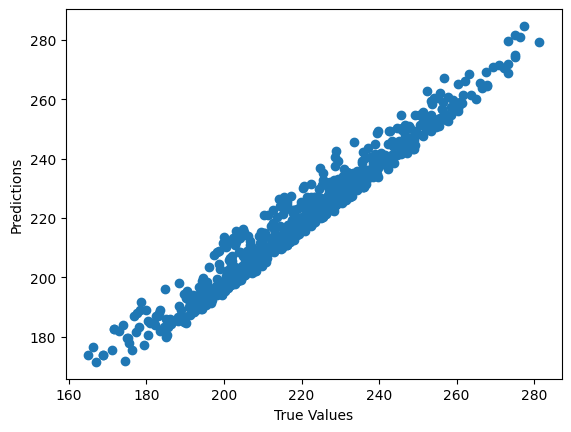

In [24]:
# make some predictions using the model
# store the predictions in y_pred
y_pred = mlp_model.predict(X_validation_transformed)

# how do the predictions compare to the true values?
# print mean square error
from sklearn import metrics
print(metrics.mean_squared_error(y_validation, y_pred))

# and a scatter plot
from matplotlib import pyplot as plt
plt.scatter(y_validation, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Cross-fold validation
As in Orange, sklearn makes it easy to do cross-fold validation. By default, the built-in tool for this calls the `score` function of the model to measure model quality on each fold; `score()` works differently per model but the documentation will tell you that for an `MLPRegressor` it's the R^2 value, which would be 1.0 for a perfect model. If you want to use a different measure like mean square error you can specify which one you want from the list [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

Here's how to perform the cross-fold validation, using 5 folds of our training set. We get a list of scores back in which each element is the score for one fold. We usually aggregate these (e.g. take the average) to get one overall score. You'll see the scores are negative: this is deliberate, and is so a "bigger" score (smaller error) is "better".

In [25]:
# we'll reuse our training data from before. In practice we'd skip the extra split to training/validation sets.

# compute scores for the 5 folds...
# remember, this makes 5 seperate models, and tests them each on a different 0.2 of the data set.
# the scores for these tests are returned in a list.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mlp_model, X_train_encoded, y_train_cleaned, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(scores.mean())

[-19.30991429 -18.63603471 -20.86669768 -21.72356501 -20.18491094]
-20.144224523434428


We'll see later that many of the tools in sklearn use cross-fold validation internally, so you don't need to do the separate steps as above. However, it's good to know that this is what's going on behind the scenes.

You can load, train and test other models in much the same way as MLPRegressor. They all have `fit()` and `predict()` functions, and can all be supplied to cross_val_score.

Try comparing a few other model types. Browse the [documentation](https://scikit-learn.org/stable/supervised_learning.html) for regression models: don't worry specifically which you choose, as we've not given any detail on these yet, but `sklearn.linear_model.LinearRegression` and `sklearn.ensemble.RandomForestRegressor` are good places to start. Which one performs best on this data?

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

m1 = RandomForestRegressor()
m2 = LinearRegression()
# ...

scores = cross_val_score(m1, X_train_encoded, y_train_cleaned, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(scores.mean())
scores2 = cross_val_score(m2, X_train_encoded, y_train_cleaned, cv=5, scoring='neg_mean_squared_error')
print(scores2)
print(scores2.mean())

[-17.82588555 -15.83267451 -14.0965301  -19.01317988 -17.50371619]
-16.85439724705717
[-19.28467425 -18.59132314 -20.84440275 -21.72625717 -20.14640706]
-20.11861287615307


Finally, we retrain the model that did best in cross validation on all the training data (not just one fold) then apply the best model to the original, unseen test data.

The test set will need the same column transformations applied, but we can choose whether any additional cleaning is needed (e.g. outliers can affect the training so we remove them there, but we might still want to see if the final model can cope with them). Here we don't do any cleaning on the test data.

In [29]:
# Put the best model you found here...
final_model = RandomForestRegressor()
final_model.fit(X_train_encoded, y_train_cleaned)

X_test_transformed = col_transform.transform(X_test)

y_pred = final_model.predict(X_test_transformed)

# how do the predictions compare to the true values?
# print mean square error
from sklearn import metrics
print(metrics.mean_squared_error(y_pred, y_test))

# is this error better or worse than the scores you've seen above? Often it will be worse (a bigger value) because
# the test data is unseen but sometimes, as is the case here, we'll be lucky and it'll be better.

14.7406210662187


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
